## Title: M5 Integer Optimization Assignment
## Author: Leo Genders
## Date: 4 August 2024

## 1) Model Formulation - Example 6.5

**Sets** \
$S$: set of service centers {Boston, Chicago, Dallas, Denver, Los Angeles, Richmond, Miami, New York, Phoenix, Pittsburgh, San Francisco, Seattle} \
$D$: set of demand locations {Boston, Chicago, Dallas, Denver, Los Angeles, Richmond, Miami, New York, Phoenix, Pittsburgh, San Francisco, Seattle}

**Parameters** \
$d_{i,j}$: distance between demand location $i$ and service center $j$ \
$t_i$: number of trips to demnad location $i$ \
must select 3 service centers

**Decision Variables** \
$x_{i,j}$: binary = 1 if demand location $i$ is assigned to service center $j$, = 0 otherwise \
$y_{j}$: binary = 1 if service center $j$ is selected, and = 0 otherwise

**Objective Function and Constraints** 

\begin{equation*}
\begin{matrix}
\displaystyle \min_{x,y} & \underset{i\in D}{\sum}\underset{j\in S}{\sum} t_i d_{i,j} x_{i,j}  &\\
\textrm{s.t.} & \underset{i\in D}{\sum} x_{i,j} & \leq & 11 y_{j} & \forall j \in S\\ 
& \underset{j \in S}{\sum} y_j & = & 3 & \\
& \underset{i\in D}{\sum} x_{i,j} & = & 1 & \forall j \in S\\
& x_{i,j} & \in & \{0,1\}, & \forall i \in D, \forall j \in S \\
& y_i & \in & \{0,1\}, & \forall i \in D \\
\end{matrix}
\end{equation*}

## 2) Excel Prototype - Example 6.5

Screenshot of Excel Model for Example 6.5

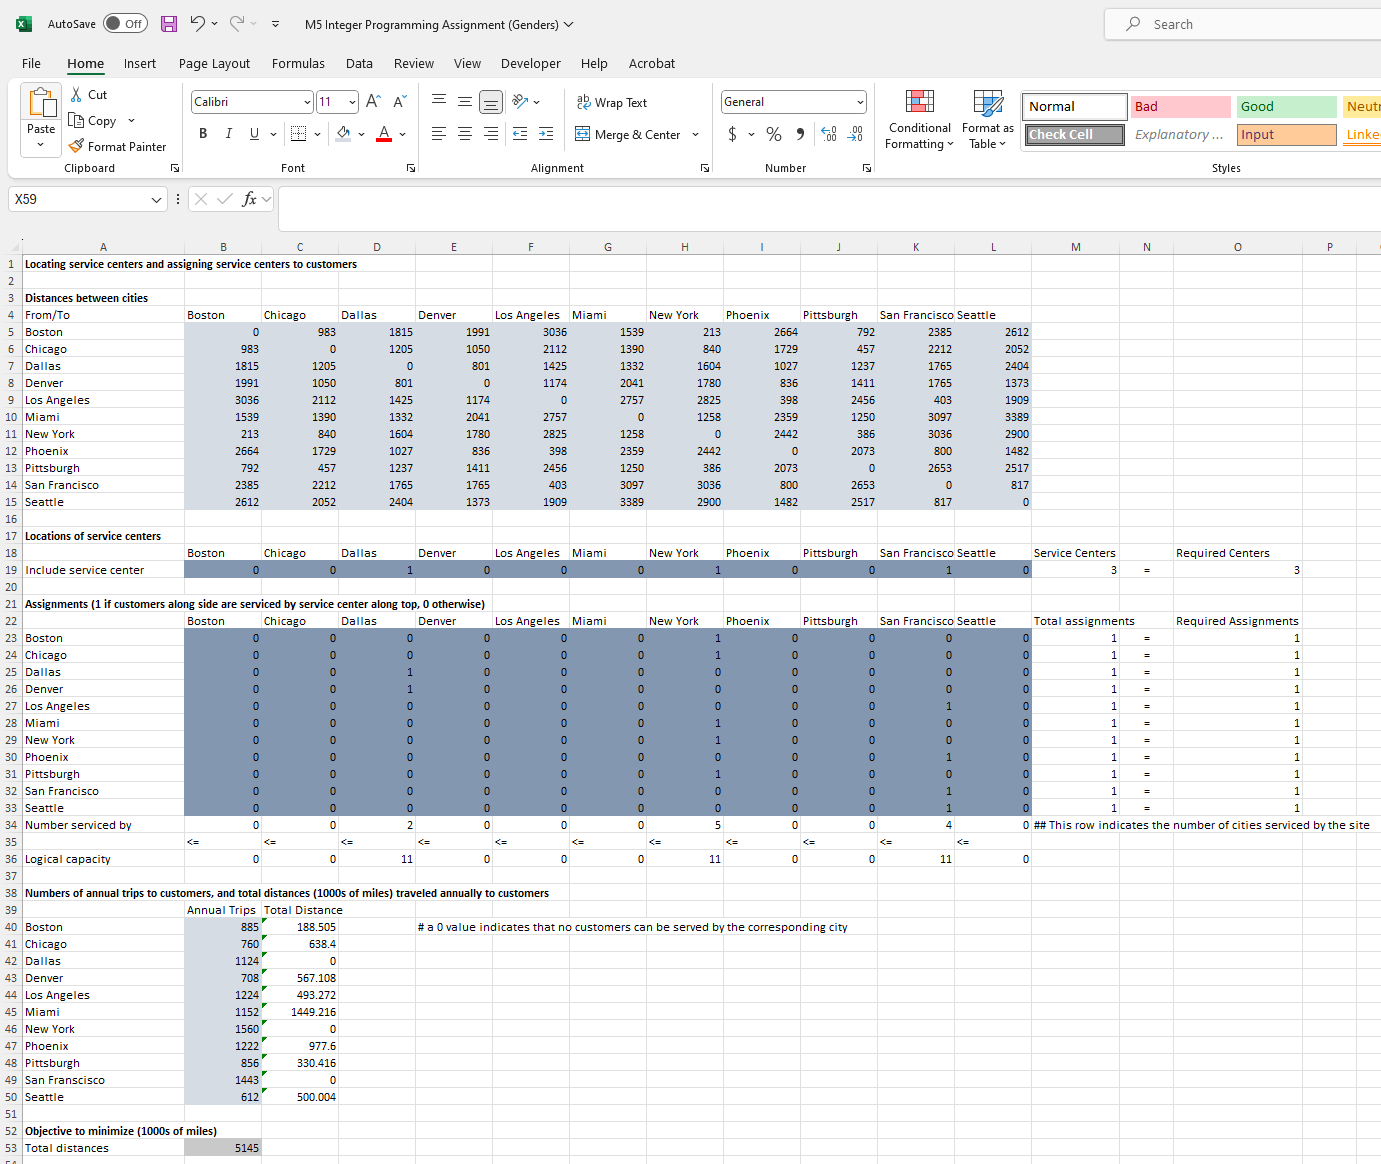

In [1]:
from IPython import display
display.Image("integer_excel_model.png")

Screenshot of Excel Solver for Example 6.5

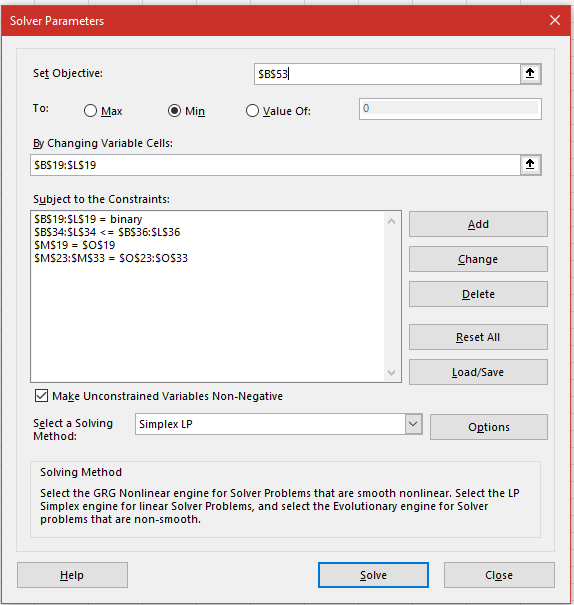

In [2]:
display.Image("integer_excel_solver.png")

## 3) Python Prototype - Example 6.5

In [3]:
# import the needed libraries
import pandas as pd
from gurobipy import *

# read in parameters and assign sets
r_df = pd.read_excel('M5 Integer Programming Assignment (Genders).xlsx',sheet_name='ex65-demand')
d_df = pd.read_excel('M5 Integer Programming Assignment (Genders).xlsx',sheet_name='ex65-miles')
d_df = d_df.set_index('FromTo') # this makes it so the 0th column is the 1st column of miles instead of city names
S = range(d_df.shape[0]) # set of service center locations (as a range)
D = range(d_df.shape[1]) # set of demand locations (as a range)
n = d_df.shape[1] # number of demand locations

# initialize model
m = Model('ex65')

# decision variables
x = m.addVars(S, D, vtype="B", name="x")
y = m.addVars(S, vtype="B", name="y")
m.update()

# objective function
m.setObjective(quicksum(r_df.iloc[0,j]*d_df.iloc[i,j]*x[i,j] for i in S for j in D), GRB.MINIMIZE)
m.update()

# constraint to relate service center selection to assignment
m.addConstrs(quicksum(x[i,j] for j in D) <= 11*y[i] for i in S)
m.update()

# constraint to choose exactly the allowed number service center locations
m.addConstr(quicksum(y[j] for j in D) == 3)
m.update()

# constraint to ensure each demand location is fulfilled by exactly one service center location
m.addConstrs(quicksum(x[i,j] for i in S) == 1 for j in D)
m.update()

# solve
m.optimize()

# print names of selected service centers
print("\n\n")
print("The service centers should be located in the following cities:")
city_names = d_df.index
for i in S:
    if y[i].x > 0.5:
        print(city_names[i])
                  
# print mapping of selected service center to demand location
print("\n")
for i in S: 
    for j in D:
        if x[i,j].x > 0.5:  
            print(f"Demand at %s is fulfilled by %s." % (city_names[j],city_names[i]))

# print objective function value
print("\n")
print(f"The total distance is %s miles." % m.objval)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-07-03
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 5 5600X 6-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 23 rows, 132 columns and 264 nonzeros
Model fingerprint: 0x1c17c8c9
Variable types: 0 continuous, 132 integer (132 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [2e+05, 5e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Found heuristic solution: objective 1.423798e+07
Presolve time: 0.00s
Presolved: 23 rows, 132 columns, 264 nonzeros
Variable types: 0 continuous, 132 integer (132 binary)
Found heuristic solution: objective 6095077.0000

Root relaxation: objective 0.000000e+00, 22 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Boun

In [4]:
############# Work Space #############

In [5]:
# view demand df
r_df

,Boston,Chicago,Dallas,Denver,Los Angeles,Miami,New York,Phoenix,Pittsburgh,San Francisco,Seattle
0,885,760,1124,708,1224,1152,1560,1222,856,1443,612


In [6]:
# view distances df
d_df.index

Index(['Boston', 'Chicago', 'Dallas', 'Denver', 'Los Angeles', 'Miami',
       'New York', 'Phoenix', 'Pittsburgh', 'San Francisco', 'Seattle'],
      dtype='object', name='FromTo')

In [7]:
# view ranges / num of locations
print(S)
print(D)
print(n)

range(0, 11)
range(0, 11)
11


In [8]:
############# Work Space #############

## 4) Python Model - Shark Tank (Distance)

## Model Formulation - Shark Tank (Distance)

**Sets** \
$D$: set of demand locations {Boston, Chicago, Dallas, Denver, Los Angeles, Richmond, Miami, New York, Phoenix, Pittsburgh, San Francisco, Seattle} \
$S$: set of potential manufacturing sites {'Abilene, TX', 'Ahwatukee Foothills, AZ',... 'Yuma, AZ'}

**Parameters** \
$d_{i,j}$: distance between manufacturing site $i$ and demand location $j$ \
$t_j$: number of trips to demand location $j$ \
must select 3 manufacturing sites \
from manufacturing site to each demand location

**Decision Variables** \
$x_{i,j}$: binary = 1 if manufacturing site $i$ fulfills demand location $i$ = 0 otherwise \
$y_i$: binary = 1 if manufactuinrg site $i$ is selected, and = 0 otherwise

**Objective Function and Constraints** 

\begin{equation*}
\begin{matrix}
\displaystyle \min_{x,y} & \underset{j \in D}{\sum}\underset{i \in S}{\sum} t_j d_{i,j} x_{i,j}  &\\
\textrm{s.t.} & \underset{j\in D}{\sum} x_{i,j} & \leq & 997 y_{j} & \forall i \in S\\ 
& \underset{i \in S}{\sum} y_j & = & 3 & \\
& \underset{i\in S}{\sum} x_{i,j} & = & 1 & \forall j \in D\\
& x_{i,j} & \in & \{0,1\}, & \forall i \in S, \forall j \in D \\
& y_i & \in & \{0,1\}, & \forall i \in S \\
\end{matrix}
\end{equation*}

In [9]:
# flipped for shark tank...
# i in S for sites
# j in D for demand locs
# control each side (undersets Left, forall right)

# xij dealing with both manufac sites and demand locs so need all potential sites and demand locs addressed
# yi only dealing with whether manufacturing site i is selected, nothing in D so no j

## Python Model - Shark Tank Distance

In [10]:
# import the needed libraries
import pandas as pd
from gurobipy import *

# read in parameters and assign sets
r_df = pd.read_excel('M5 Integer Programming Assignment (Genders).xlsx',sheet_name='st-demand')
d_df = pd.read_excel('M5 Integer Programming Assignment (Genders).xlsx',sheet_name='st-miles')
d_df = d_df.set_index('FromTo') # this makes it so the 0th column is the 1st column of miles instead of city names
S = range(d_df.shape[0]) # set of manufacturing site locations (as a range)
D = range(d_df.shape[1]) # set of demand locations (as a range)
n = d_df.shape[1] # number of demand locations

# initialize model
m = Model('st dist')

# decision variables
x = m.addVars(S, D, vtype="B", name="x")
y = m.addVars(S, vtype="B", name="y")
m.update()

# objective function - minimize distance
m.setObjective(quicksum(r_df.iloc[0,j]*d_df.iloc[i,j]*x[i,j] for i in S for j in D), GRB.MINIMIZE)
m.update()

# constraint to relate manufacturing site selection to assignment
m.addConstrs(quicksum(x[i,j] for j in D) <= 997*y[i] for i in S)
m.update()

# constraint to choose exactly the allowed number manufacturing sites
m.addConstr(quicksum(y[i] for i in S) == 3)
m.update()

# constraint to ensure each demand location is fulfilled by exactly one manufacturing site
m.addConstrs(quicksum(x[i,j] for i in S) == 1 for j in D)
m.update()

# solve
m.optimize()

# print names of selected manufacturing sites
print("\n\n")
print("The manufacturing sites should be located in the following cities:")
city_names = d_df.index
for i in S:
    if y[i].x > 0.5:
        print(city_names[i]) 
                  
# print mapping of selected manufacturing site to demand location
print("\n")
for j in D: # for all demand locations in D
    for i in S: # for all manufacturing sites in S
        if x[i,j].x > 0.5:  
            print(f"Demand at %s is fulfilled by %s." % (d_df.columns[j], city_names[i])) # need  to ref the cols not index for d_df

# print objective function value
print("\n")
print(f"The total distance is %s miles." % m.objval)

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 5 5600X 6-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 1010 rows, 12961 columns and 25922 nonzeros
Model fingerprint: 0x03657295
Variable types: 0 continuous, 12961 integer (12961 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [3e+03, 2e+07]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Found heuristic solution: objective 2.398210e+07
Presolve time: 0.03s
Presolved: 1010 rows, 12961 columns, 25922 nonzeros
Variable types: 0 continuous, 12961 integer (12961 binary)
Found heuristic solution: objective 1.605516e+07

Root relaxation: objective 0.000000e+00, 26 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Bes

In [11]:
############# Work Space #############

In [12]:
# check indices
print(r_df.index)

RangeIndex(start=0, stop=1, step=1)


In [13]:
# check indices
print(d_df.index)

Index(['Abilene, TX', 'Ahwatukee Foothills, AZ', 'Akron, OH', 'Alafaya, FL',
       'Alameda, CA', 'Albany, NY', 'Albany, GA', 'Albany, OR',
       'Albuquerque, NM', 'Alexandria, VA',
       ...
       'Worcester, MA', 'Wylie, TX', 'Wyoming, MI', 'Yakima, WA',
       'Yonkers, NY', 'Yorba Linda, CA', 'Youngstown, OH', 'Yuba City, CA',
       'Yucaipa, CA', 'Yuma, AZ'],
      dtype='object', name='FromTo', length=997)


In [14]:
# check cols
print(d_df.columns)

Index(['Boston, MA', 'Chicago, IL', 'Dallas, TX', 'Denver, CO',
       'Los Angeles, CA', 'Richmond, VA', 'Miami, FL', 'New York, NY',
       'Phoenix, AZ', 'Pittsburgh, PA', 'San Francisco, CA', 'Seattle, WA'],
      dtype='object')


In [15]:
# check cols
print(r_df.columns)

Index(['Boston, MA', 'Chicago, IL', 'Dallas, TX', 'Denver, CO',
       'Los Angeles, CA', 'Richmond, VA', 'Miami, FL', 'New York, NY',
       'Phoenix, AZ', 'Pittsburgh, PA', 'San Francisco, CA', 'Seattle, WA'],
      dtype='object')


In [16]:
print(S)
print(D)
print(n)

range(0, 997)
range(0, 12)
12


In [17]:
d_df.columns[j]

'Seattle, WA'

In [18]:
############# Work Space #############

## 5) Python Model - Shark Tank (Time)

## Model Formulation - Shark Tank (Time)

**Sets** \
$D$: set of demand locations {Boston, Chicago, Dallas, Denver, Los Angeles, Richmond, Miami, New York, Phoenix, Pittsburgh, San Francisco, Seattle} \
$S$: set of potential manufacturing sites {'Abilene, TX', 'Ahwatukee Foothills, AZ',... 'Yuma, AZ'}

**Parameters** \
$d_{i,j}$: time in hours between manufacturing site $i$ and demand location $j$ \
$t_j$: number of trips to demand location $j$ \
must select 3 manufacturing sites \
from manufacturing site to each demand location

**Decision Variables** \
$x_{i,j}$: binary = 1 if manufacturing site $i$ fulfills demand location $i$ = 0 otherwise \
$y_i$: binary = 1 if manufactuinrg site $i$ is selected, and = 0 otherwise

**Objective Function and Constraints** 

\begin{equation*}
\begin{matrix}
\displaystyle \min_{x,y} & \underset{j \in D}{\sum}\underset{i \in S}{\sum} t_j d_{i,j} x_{i,j}  &\\
\textrm{s.t.} & \underset{j\in D}{\sum} x_{i,j} & \leq & 997 y_{j} & \forall i \in S\\ 
& \underset{i \in S}{\sum} y_j & = & 3 & \\
& \underset{i\in S}{\sum} x_{i,j} & = & 1 & \forall j \in D\\
& x_{i,j} & \in & \{0,1\}, & \forall i \in S, \forall j \in D \\
& y_i & \in & \{0,1\}, & \forall i \in S \\
\end{matrix}
\end{equation*}

## Python Model - Shark Tank (Time)

In [19]:
# import the needed libraries
import pandas as pd
from gurobipy import *

# read in parameters and assign sets
r_df = pd.read_excel('M5 Integer Programming Assignment (Genders).xlsx',sheet_name='st-demand')
d_df = pd.read_excel('M5 Integer Programming Assignment (Genders).xlsx',sheet_name='st-hours')
d_df = d_df.set_index('FromTo') # this makes it so the 0th column is the 1st column of miles instead of city names
S = range(d_df.shape[0]) # set of manufacturing site locations (as a range)
D = range(d_df.shape[1]) # set of demand locations (as a range)
n = d_df.shape[1] # number of demand locations

# initialize model
m = Model('st dist')

# decision variables
x = m.addVars(S, D, vtype="B", name="x")
y = m.addVars(S, vtype="B", name="y")
m.update()

# objective function - minimize time
m.setObjective(quicksum(r_df.iloc[0,j]*d_df.iloc[i,j]*x[i,j] for i in S for j in D), GRB.MINIMIZE)
m.update()

# constraint to relate manufacturing site selection to assignment
m.addConstrs(quicksum(x[i,j] for j in D) <= 997*y[i] for i in S)
m.update()

# constraint to choose exactly the allowed number manufacturing sites
m.addConstr(quicksum(y[i] for i in S) == 3)
m.update()

# constraint to ensure each demand location is fulfilled by exactly one manufacturing site
m.addConstrs(quicksum(x[i,j] for i in S) == 1 for j in D)
m.update()

# solve
m.optimize()

# print names of selected manufacturing sites
print("\n\n")
print("The manufacturing sites should be located in the following cities:")
city_names = d_df.index
for i in S:
    if y[i].x > 0.5:
        print(city_names[i]) 
                  
# print mapping of selected manufacturing site to demand location
print("\n")
for j in D: # for all demand locations in D
    for i in S: # for all manufacturing sites in S
        if x[i,j].x > 0.5:  
            print(f"Demand at %s is fulfilled by %s." % (d_df.columns[j], city_names[i])) # need  to ref the cols not index for d_df

# print objective function value
print("\n")
print(f"The total time is %s hours." % m.objval)

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 5 5600X 6-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 1010 rows, 12961 columns and 25922 nonzeros
Model fingerprint: 0x0b510633
Variable types: 0 continuous, 12961 integer (12961 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [1e+02, 2e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Found heuristic solution: objective 266026.98334
Presolve time: 0.02s
Presolved: 1010 rows, 12961 columns, 25922 nonzeros
Variable types: 0 continuous, 12961 integer (12961 binary)
Found heuristic solution: objective 192102.23555

Root relaxation: objective 0.000000e+00, 26 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Bes

## 6) Analysis

Based on my analysis, if minimizing total distance is the most important measurement, then threee manufacturing sites should be placed in the following cities:

* **Denver, CO**
* **Los Angeles, CA**
* **Silver Spring, MD**

The demand for each of the 12 demand locations and their fulfillment from the associated manufacturing site for minimizing total distance are: \
* Demand at **Boston, MA** is fulfilled by **Silver Spring, MD**.
* Demand at **Chicago, IL** is fulfilled by **Silver Spring, MD**.
* Demand at **Dallas, TX** is fulfilled by **Denver, CO**.
* Demand at **Denver, CO** is fulfilled by **Denver, CO**.
* Demand at **Los Angeles, CA** is fulfilled by **Los Angeles, CA**.
* Demand at **Richmond, VA** is fulfilled by **Silver Spring, MD**.
* Demand at **Miami, FL** is fulfilled by **Silver Spring, MD**.
* Demand at **New York, NY** is fulfilled by **Silver Spring, MD**.
* Demand at **Phoenix, AZ** is fulfilled by **Los Angeles, CA**.
* Demand at **Pittsburgh, PA** is fulfilled by **Silver Spring, MD**.
* Demand at **San Francisco, CA** is fulfilled by **Los Angeles, CA**.
* Demand at **Seattle, WA** is fulfilled by **Los Angeles, CA**.


The total distance is **5619332.6589485 miles**.

**************************************************

If minimizing total travel time is the most important measurement, then three manufacturing sites should be placed in the following cities: 

* **Denver, CO**
* **Los Angeles, CA**
* **Wheaton, MD**

The demand for each of the 12 demand locations and their fulfillment from the associated manufacturing site for minimizing total time are:
* Demand at **Boston, MA** is fulfilled by **Wheaton, MD**.
* Demand at **Chicago, IL** is fulfilled by **Wheaton, MD**.
* Demand at **Dallas, TX** is fulfilled by **Denver, CO**.
* Demand at **Denver, CO** is fulfilled by **Denver, CO**.
* Demand at **Los Angeles, CA** is fulfilled by **Los Angeles, CA**.
* Demand at **Richmond, VA** is fulfilled by **Wheaton, MD**.
* Demand at **Miami, FL** is fulfilled by **Wheaton, MD**.
* Demand at **New York, NY** is fulfilled by **Wheaton, MD**.
* Demand at **Phoenix, AZ** is fulfilled by **Los Angeles, CA**.
* Demand at **Pittsburgh, PA** is fulfilled by **Wheaton, MD**.
* Demand at **San Francisco, CA** is fulfilled by **Los Angeles, CA**.
* Demand at **Seattle, WA** is fulfilled by **Denver, CO**.


The total time is **81845.54445252598 hours**.

******************************************************

Both Denver, CO and Los Angeles, CA are the best choice in the models for minimizing time and minimizing distance. The determination for the third manufacuturing site changes from Silver Spring, MD to Wheaton, MD when examining distance then time. As such, the billionaire from ABC's Shark Tank must identify which metric is more important to minimize. Interestingly, according to Google Maps, the distance from Wheaton, MD to Silver Spring MD is only 5.7 miles or 19 minutes drive time and yet the optimal solutions are different. If cost is associated to mileage, select the Shark Tank Distance model. If cost is associated to travel time, select the Shark Tank Time mdoel.